In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
batch_size = 32
img_height = 180
img_width = 180
data_dir = "/content/drive/MyDrive/ibm assignment 3"

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255, horizontal_flip = True, vertical_flip = True, zoom_range = 0.2)

In [ ]:
x_train = train_datagen.flow_from_directory(r"/content/drive/MyDrive/ibm assignment 3", target_size = (64,64) , class_mode = "categorical", batch_size = 100)

Found 4321 images belonging to 5 classes.


In [ ]:
data_augmentation = Sequential(
  [
    layers.RandomFlip("horizontal",input_shape=(img_height, img_width, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense
model = Sequential()

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4321 files belonging to 5 classes.
Using 3457 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4321 files belonging to 5 classes.
Using 864 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


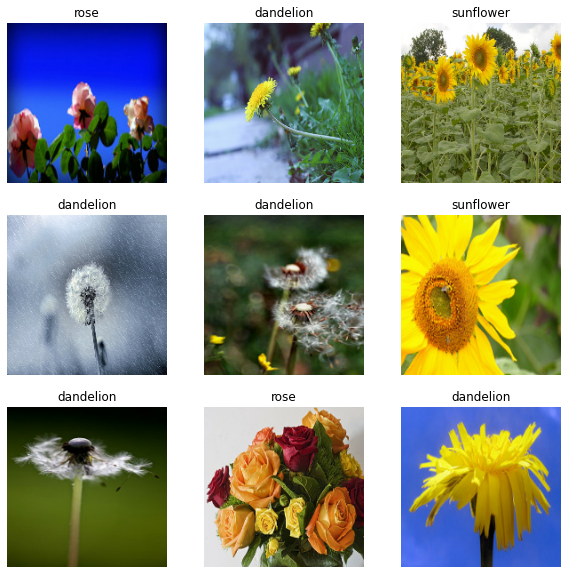

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
model.add(Convolution2D(32, (3,3), activation = "relu", input_shape = (64,64,3) ))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(300, activation = "relu"))
model.add(Dense(150, activation = "relu")) #mulitple dense layers
model.add(Dense(5, activation = "softmax")) #output layer

In [ ]:
num_classes = len(class_names)

model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(loss = "categorical_crossentropy", metrics = ["accuracy"], optimizer = "adam")
len(x_train)

44

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
109/109 [==============================] - 340s 3s/step - loss: 1.3795 - accuracy: 0.4116 - val_loss: 1.1773 - val_accuracy: 0.4919
Epoch 2/10
109/109 [==============================] - 139s 1s/step - loss: 1.0859 - accuracy: 0.5551 - val_loss: 1.0397 - val_accuracy: 0.5868
Epoch 3/10
109/109 [==============================] - 140s 1s/step - loss: 0.9703 - accuracy: 0.6124 - val_loss: 1.0232 - val_accuracy: 0.6019
Epoch 4/10
109/109 [==============================] - 141s 1s/step - loss: 0.9105 - accuracy: 0.6532 - val_loss: 1.0765 - val_accuracy: 0.5833
Epoch 5/10
109/109 [==============================] - 139s 1s/step - loss: 0.8757 - accuracy: 0.6647 - val_loss: 0.8927 - val_accuracy: 0.6655
Epoch 6/10
109/109 [==============================] - 141s 1s/step - loss: 0.8258 - accuracy: 0.6783 - val_loss: 0.8925 - val_accuracy: 0.6609
Epoch 7/10
109/109 [==============================] - 140s 1s/step - loss: 0.8071 - accuracy: 0.6925 - val_loss: 0.8791 - val_accuracy: 0.6713

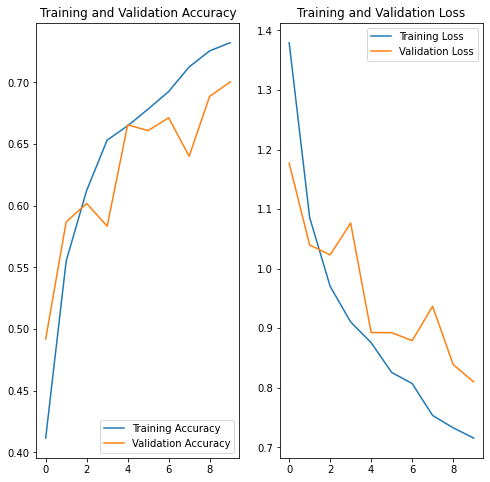

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
model.save("flowers.h1")

In [ ]:
model.save("flowers.m5")

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

In [ ]:
model = load_model("/content/flowers.h1")

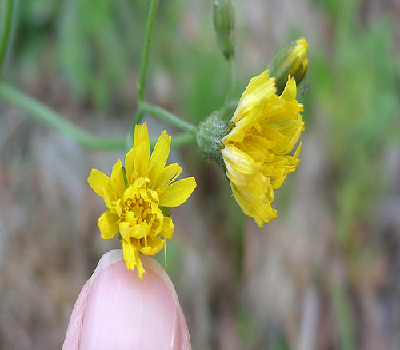

In [ ]:
from tensorflow.keras.preprocessing import image
img = image.load_img('/content/drive/MyDrive/ibm assignment 3/dandelion/13887066460_64156a9021.jpg',target_size=(350,400))
img